/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 109ms/step - accuracy: 0.3262 - loss: 1.8312 - val_accuracy: 0.4984 - val_loss: 1.3652
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 97ms/step - accuracy: 0.5480 - loss: 1.2678 - val_accuracy: 0.6018 - val_loss: 1.1344
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.6136 - loss: 1.0840 - val_accuracy: 0.6393 - val_loss: 1.0322
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.6639 - loss: 0.9662 - val_accuracy: 0.6448 - val_loss: 1.0050
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.6869 - loss: 0.8931 - val_accuracy: 0.6924 - val_loss: 0.8991
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6926 - loss: 0.8918
Test accuracy: 0.6923999786376953
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.69      0.76      0.73      1000
  automobile       0.83      0.78      0.80      1000
        bird   

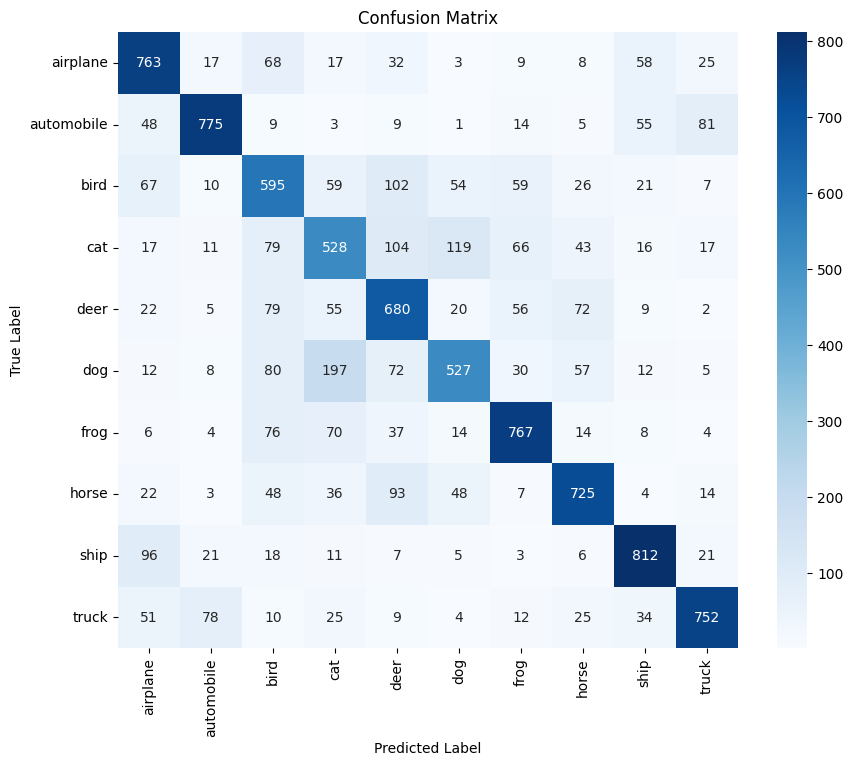

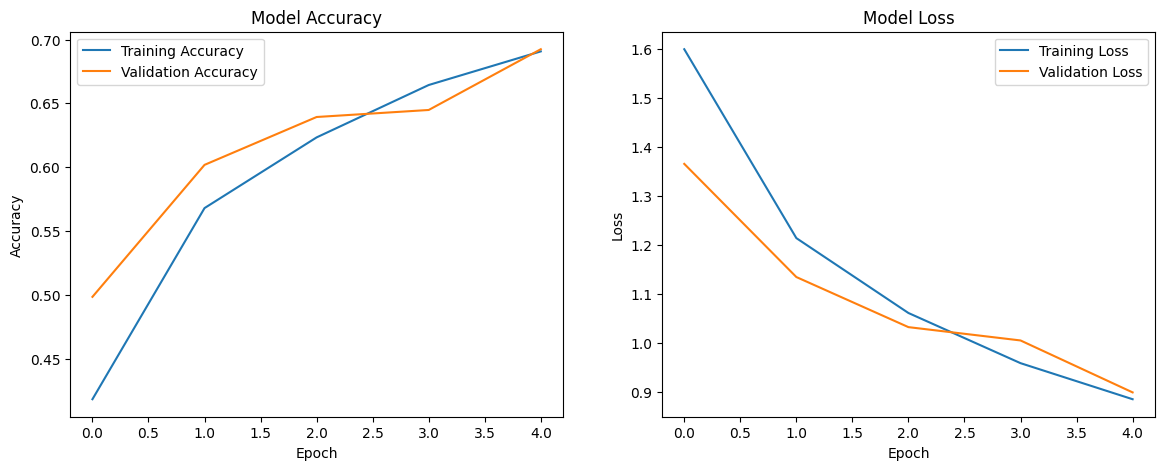

In [2]:
"""
This code demonstrates how to build and train a simple Convolutional Neural Network (CNN) using the Keras library
with the CIFAR-10 dataset. The network is designed to classify images of objects into 10 categories.
It includes performance metrics and additional visualizations.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)  # for evaluation

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with additional epochs
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels_categorical))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

# Generate classification report
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation accuracy and loss values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
